# Musical instruments prices
### A study of the prices of musical instruments in Sri Lanka

Author: Leandro Hornos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from wordcloud import WordCloud

In [2]:
df = pd.read_csv("raw-data.csv", encoding="utf-8", parse_dates=["published_date"])

## Cleaning the dataset

Let's take a look at data that we imported from the csv

In [3]:
df.head(3)

,Title,Sub_title,Price,Instrument_Type,Condition,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Yamaha (SY-77) Music Synthesizer for sale,"Posted on 04 Oct 7:11 pm, Ja-Ela, Gampaha","Rs 39,000",Keyboard / Piano,Used,"Ja-Ela, Gampaha",Â°â¢Â°Sri Lanka's Largest Digital Piano Selle...,https://ikman.lk/en/ad/yamaha-sy-77-music-synt...,Seven Star International,Member,2021-10-04 19:11:00
1,SRX-718 BASS BIN (PAIR) for sale,"Posted on 10 Oct 7:54 pm, Kadawatha, Gampaha","Rs 77,500",Studio / Live Music Equipment,New,"Kadawatha, Gampaha",â¡Watts 3200â¡â¡Treated Plywoodâ¡,https://ikman.lk/en/ad/srx-718-bass-bin-pair-f...,Sasiru Super Sonics,Member,2021-10-10 19:54:00
2,Piano (Malcom Mendis Piano) for sale,"Posted on 13 Oct 12:43 pm, Kandana, Gampaha","Rs 130,000",Keyboard / Piano,Used,"Kandana, Gampaha","Sri Lanka's Biggest Piano Sale, Reasonable pri...",https://ikman.lk/en/ad/piano-malcom-mendis-pia...,Sell Fast | à¶à¶³à·à¶± | MCI Ikman à¶¯à·à¶±...,Member,2021-10-13 12:43:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            5167 non-null   object        
 1   Sub_title        5167 non-null   object        
 2   Price            5167 non-null   object        
 3   Instrument_Type  5167 non-null   object        
 4   Condition        5167 non-null   object        
 5   Location         5167 non-null   object        
 6   Description      5167 non-null   object        
 7   Post_URL         5167 non-null   object        
 8   Seller_name      5167 non-null   object        
 9   Seller_type      5167 non-null   object        
 10  published_date   5167 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(10)
memory usage: 444.2+ KB


We can se that we have no missing values on this dataset. 

In [5]:
print(df.Condition.unique())
print(df.Seller_type.unique())

['Used' 'New']
['Member' 'Premium-Member']


As suspected, both variables are binaries. We will change those of a new pair of variables that take 1s and 0s as it's possible values

**Prices**

In [6]:
# We want to convert prices to numbers:

def parsePrice(text):
    text = text.replace("Rs ","")
    text = text.replace(",","")
    return int(text)

df["Price_value"] = df["Price"].apply(lambda x: parsePrice(x))

**Location**<br>
The location field contains the name of the neighborhood/suburb and the city, separated by a comma. It would be a good idea to split this columns in two.

In [7]:
def getLocation(location, option="city"):
    locdata = location.split(",")
    if option == "city":
        return locdata[1].strip()
    elif option == "neighborhood":
        return locdata[0].strip()
    else:
        return np.nan

print(getLocation("Rajagiriya, Colombo", "city"))
df[["Neigborhood", "City"]] = df['Location'].apply(lambda x: pd.Series([getLocation(x,"neighborhood"),getLocation(x,"city")]))
df.drop(["Location"],axis=1, inplace=True)
df.head()

Colombo


,Title,Sub_title,Price,Instrument_Type,Condition,Description,Post_URL,Seller_name,Seller_type,published_date,Price_value,Neigborhood,City
0,Yamaha (SY-77) Music Synthesizer for sale,"Posted on 04 Oct 7:11 pm, Ja-Ela, Gampaha","Rs 39,000",Keyboard / Piano,Used,Â°â¢Â°Sri Lanka's Largest Digital Piano Selle...,https://ikman.lk/en/ad/yamaha-sy-77-music-synt...,Seven Star International,Member,2021-10-04 19:11:00,39000,Ja-Ela,Gampaha
1,SRX-718 BASS BIN (PAIR) for sale,"Posted on 10 Oct 7:54 pm, Kadawatha, Gampaha","Rs 77,500",Studio / Live Music Equipment,New,â¡Watts 3200â¡â¡Treated Plywoodâ¡,https://ikman.lk/en/ad/srx-718-bass-bin-pair-f...,Sasiru Super Sonics,Member,2021-10-10 19:54:00,77500,Kadawatha,Gampaha
2,Piano (Malcom Mendis Piano) for sale,"Posted on 13 Oct 12:43 pm, Kandana, Gampaha","Rs 130,000",Keyboard / Piano,Used,"Sri Lanka's Biggest Piano Sale, Reasonable pri...",https://ikman.lk/en/ad/piano-malcom-mendis-pia...,Sell Fast | à¶à¶³à·à¶± | MCI Ikman à¶¯à·à¶±...,Member,2021-10-13 12:43:00,130000,Kandana,Gampaha
3,Yamaha Semi Acoustic Guitars for sale,"Posted on 13 Oct 12:44 pm, Rajagiriya, Colombo","Rs 36,000",String Instrument / Amplifier,Used,Yamaha semi acoustic guitar. Model- FX310A. B...,https://ikman.lk/en/ad/yamaha-semi-acoustic-gu...,Tiran Rathnayaka,Member,2021-10-13 12:44:00,36000,Rajagiriya,Colombo
4,Yamaha Guitar for sale,"Posted on 13 Oct 12:06 pm, Delgoda, Gampaha","Rs 35,000",String Instrument / Amplifier,Used,Yamaha fG-151 Made in Japan Good condition Goo...,https://ikman.lk/en/ad/yamaha-guitar-ex-for-sa...,shiran,Member,2021-10-13 12:06:00,35000,Delgoda,Gampaha


**Title**<br>
We can see that text fields are filled with strange characters. # If we take a look at the "Description" column, we will see some weird characters mixed with the text

In [8]:
# Let's se an example:
badtext = df.iloc[0].Description
badtext

"Â°â\x80¢Â°Sri Lanka's Largest Digital Piano SellerÂ°â\x80¢Â° Â°â\x80¢Â° Direct Imported Â°â\x80¢Â° Fully Functional and ready to Use Â°â\x80¢Â° Cosmetics : 10/10Â°â\x80¢Â° Ideal for an Hotelier or For an keen learner.Â°â\x80¢Â° 6 months of  WarrantyÂ°â\x80¢Â° Furnished to the OptimumÂ°â\x80¢Â° At Brand New Conditionâ\x80¢Â°â\x80¢ The Art of Honour Lasting Values Â® â\x80¢Â°â\x80¢"

In [9]:
# We are going to make a list of the characters we want to remove and then
# we will create a function that will replace those characters with an empty string

badchars = ["Â","\x80¢","°","â","®","¡","à", "¶","±", "ð"]

def cleanText(text, badchar_list):
    newtext = text
    for char in badchar_list:
        newtext = newtext.replace(char,"")
    return newtext

# In this example we se many of the characters dissapearing, but most of
# the description entries are full of added substrings with seemingly random
# patterns, so it is difficult to easyly clean them all with a simple script.

goodtext = cleanText(badtext, badchars)
goodtext

"Sri Lanka's Largest Digital Piano Seller  Direct Imported  Fully Functional and ready to Use  Cosmetics : 10/10 Ideal for an Hotelier or For an keen learner. 6 months of  Warranty Furnished to the Optimum At Brand New Condition The Art of Honour Lasting Values  "

In [10]:
# We apply the changes to the dataframe
df["Description"] = df["Description"].apply(lambda x: cleanText(x, badchars))
df["Title"] = df["Title"].apply(lambda x: cleanText(x, badchars))

But, even though this cleans some of the fields, there are many that are plain unusable. Most of the descriptions are filleds with strange characters, but only a few title fields are completely unusable. We can se it is only about 70 entries:

In [11]:
# Those rows cannot be used, so we drop them
df = df.sort_values(["Title"], ascending=False)
df[["Title", "Description"]].iloc[60:75]

,Title,Description
2417,··½ »§· ·§ ·» for sale,··½ »§···· ·¸ » ½¯ ·§ ·».... ··...
3158,··· ·§ ·» for sale,"§ ···º ··· ,···¹,¸·½·½ ,··,..."
4548,½·­·· ·· ½¯ MP3 TRACKS for sale,· ·­ ·º ···¯·····¯º ·¯·· 201...
2490,½·­·¸ ·§·»· for sale,"½·­· ···· ·§·»·,··©·,·º½··,..."
150,½· 15 ··½· §·´· for sale,··¯§¸ ­·º·· ½· 15 ··½· §·´· ¯·...
4532,½· 15 §·´· 2 · for sale,··´·»·º§¸ ­. ½· 15 ·½· 2 ·
4992,FERNANDES 4 String Bass Guitar for sale,··¯§¸ ­·º···. normal volume control 3·...
3140,yamaha wireless mic for sale,Brand newWireless mic
136,yamaha stage custom for sale,Import yamaha stage custom sell pack Good soun...
3870,yamaha speakers for sale,Brand new condition


In [12]:
df.drop(df.index[:70], inplace=True)
df[["Title", "Description"]].iloc[:10]

,Title,Description
2486,yamaha psr2000 for sale,all keyboards are not in working condition.goo...
2072,yamaha psr e 463 for sale,Brand new conditionUsb midi track playAudio re...
3540,yamaha psr e 403 for sale,"··¯¸ ­­··º· ­Manual, software cd ­"
1230,yamaha piano for sale,Yamaha piano for saleGood condition Call for m...
2866,yamaha pasifica 112j for sale,Giurat eke middel pic up eka weda na
1884,yamaha mixer 6 chanel for sale,yamaha mixer 6 chanelorginel japan use japan f...
1051,yamaha hs 8 for sale,yamaha hs 8 from USA Brand new condition 100%
3982,yamaha double top speakers for sale,Super quality soundsGood low Perfect for outdo...
2144,yamaha csr225 for sale,No errorsGood condition full set
2024,yamaha bbn5 japan bass Guitar for sale,yamaha bbn5 japan bass Guitarfrom japan


Everything looks fine, but whe see the irrelevan phrase "for sale" in most of the titles. We are going to remove it before going on.

In [13]:
def removeIrrelevantSubstring(string,substring):
    return string.replace(substring,"")

df["Title"] = df["Title"].apply(lambda x: removeIrrelevantSubstring(x, " for sale"))

# Check that the substring is gone
df["Title"].iloc[:10]

2486                   yamaha psr2000
2072                 yamaha psr e 463
3540                 yamaha psr e 403
1230                     yamaha piano
2866             yamaha pasifica 112j
1884            yamaha mixer 6 chanel
1051                      yamaha hs 8
3982       yamaha double top speakers
2144                    yamaha csr225
2024    yamaha bbn5 japan bass Guitar
Name: Title, dtype: object

In [14]:
# We saved the processed data
# df.to_csv("processed-data.csv")

## Data Expansion

We have a title variable that, contains a short text describing the product. It would be interesting to be able to identify if the product is an instrument or an accesory and, ideally, to get the name of the item. That would allow us to perform a deeper analisis, detecting trends on items itself and no only broad categories.

### Extracting the product from the Title

Even though the dataset only contains a broad classification of products, the title of each entry contains a detailed description of what it is, from which the product can be extracted. We know that the dataset contains mainly musical instruments, that are quite easy to identify, and all sorts of accesories, parts and devices that will not be that easy to extract.<br>
The aproach that we are going to take is to obtain a list in english of the most popular musical instruments in the world. We will also make a list of common music related products. We will search for this keywords in the titles, and the info about the matches will be stored in two new columns, one containing the name of the product and one a category label in order to discriminate actual musical instruments from other products.

In [15]:
# As a simple first approach, we are going to use a list of common instruments
# and we are going to check for each instrument in each title text

def extractKeyword(text, keywords):
    # Recieves a dictionary with lists of
    # types of products
    for productType in list(keywords.keys()):
        for product in keywords[productType]:
            if product.upper() in text.upper():
                return (product.capitalize()+","+productType)
    # If there are no matches return NaN
    return np.nan

In [16]:
with open("resources/instruments_names.json") as file:
    keywords = json.load(file)

print(keywords["equipment"])
df["Product"] = df.apply(lambda row: extractKeyword(row["Title"], keywords), axis=1)

def getCategory(value, option="category"):
    if type(value) != str:
        return np.nan
    data = value.split(",")
    if option == "product":
        return data[0].strip()
    elif option == "category":
        return data[1].strip()
    else:
        return np.nan


df[["Product", "Category"]] = df['Product'].apply(lambda x: pd.Series([getCategory(x,"product"), getCategory(x,"category")]))

print(100 * int(df[["Product"]].count()) /int(df[["Title"]].count())," % of the products have been guessed from the title\n")
df.head()

['speaker', 'microphone', 'mic', 'mixer', 'effect', 'recorder', 'amplifier', 'light', 'console', 'card', 'monitor']
73.1606827545615  % of the products have been guessed from the title



,Title,Sub_title,Price,Instrument_Type,Condition,Description,Post_URL,Seller_name,Seller_type,published_date,Price_value,Neigborhood,City,Product,Category
2486,yamaha psr2000,"Posted on 04 Sep 12:41 pm, Rambukkana, Kegalle","Rs 10,500",Keyboard / Piano,Used,all keyboards are not in working condition.goo...,https://ikman.lk/en/ad/yamaha-psr2000-for-sale...,migara,Member,2021-09-04 12:41:00,10500,Rambukkana,Kegalle,NaN,NaN
2072,yamaha psr e 463,"Posted on 13 Oct 1:11 pm, Wennappuwa, Puttalam","Rs 61,000",Keyboard / Piano,Used,Brand new conditionUsb midi track playAudio re...,https://ikman.lk/en/ad/yamaha-psr-e-463-for-sa...,sajith,Member,2021-10-13 13:11:00,61000,Wennappuwa,Puttalam,NaN,NaN
3540,yamaha psr e 403,"Posted on 05 Nov 11:23 pm, Ganemulla, Gampaha","Rs 35,000",Keyboard / Piano,Used,"··¯¸ ­­··º· ­Manual, software cd ­",https://ikman.lk/en/ad/yamaha-psr-e-403-for-sa...,Chithrananda Weerarathne,Member,2021-11-05 23:23:00,35000,Ganemulla,Gampaha,NaN,NaN
1230,yamaha piano,"Posted on 28 Sep 12:08 pm, Wattala, Gampaha","Rs 86,000",Keyboard / Piano,Used,Yamaha piano for saleGood condition Call for m...,https://ikman.lk/en/ad/yamaha-piano-for-sale-f...,Samanmalee Fonseka,Member,2021-09-28 12:08:00,86000,Wattala,Gampaha,Piano,instrument
2866,yamaha pasifica 112j,"Posted on 26 Aug 11:59 am, Katunayake, Gampaha","Rs 16,000",String Instrument / Amplifier,Used,Giurat eke middel pic up eka weda na,https://ikman.lk/en/ad/yamaha-pasifica-112j-fo...,Shan Ekanayaka,Member,2021-08-26 11:59:00,16000,Katunayake,Gampaha,NaN,NaN


In [17]:
df.sort_index(inplace=True)
df[df.Product.notnull()][["Title", "Product", "Category","Description"]].head()

,Title,Product,Category,Description
0,Yamaha (SY-77) Music Synthesizer,Synthesizer,instrument,Sri Lanka's Largest Digital Piano Seller Dire...
2,Piano (Malcom Mendis Piano),Piano,instrument,"Sri Lanka's Biggest Piano Sale, Reasonable pri..."
3,Yamaha Semi Acoustic Guitars,Guitar,instrument,Yamaha semi acoustic guitar. Model- FX310A. B...
4,Yamaha Guitar,Guitar,instrument,Yamaha fG-151 Made in Japan Good condition Goo...
5,Violin,Violin,instrument,Brand new ConditionFull set With BoxBrand - Ne...


In [18]:
print ("This are the Instrumets that where identified:\n")
df.Product.unique()

This are the Instrumets that where identified:



array(['Synthesizer', nan, 'Piano', 'Guitar', 'Violin', 'Card',
       'Melodica', 'Cymbal', 'Drum', 'Keyboard', 'Pedal', 'Pickup',
       'Speaker', 'Monitor', 'Bass guitar', 'Microphone', 'Bongo', 'Case',
       'Strings', 'Flute', 'Serpina', 'Mic', 'Organ', 'Recorder',
       'Amplifier', 'Trumpet', 'Mixer', 'Light', 'Console', 'Effect',
       'Saxophone', 'Cello', 'Mandolin', 'Clarinet', 'Ukulele', 'Vinyl',
       'Harp', 'Sitar', 'Grand piano', 'Viola', 'Tambourine', 'Accordian',
       'Glockenspiel', 'Harmonica', 'Trombone'], dtype=object)

Let's take a look at the products that we could not guess. What are they? One way to get a better idea of what kind of products are being left out is to make a word cloud of the titles of those unclassified products.

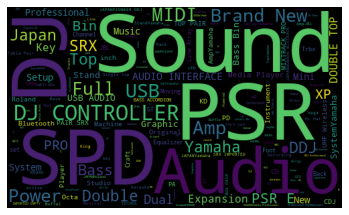

In [19]:
def showWordCloud(text):
    wordCloud = WordCloud(width=500, height=300, random_state=42, max_font_size=120).generate(text)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.show()
    
allTitles = "".join(titles for titles in df["Title"][df.Product.isnull()])

showWordCloud(allTitles)


**Note:** After making this wordcloud, several products were added to the products list in the json files. This allowed to increase the number of product macthes from 43% to 68%

### Guessing the Brand

This website (https://www.americanmusical.com/BrandList.aspx) contains a broad list of companies that comercialize musical instruments. The list was copyied and pasted on a text file. Since it is a list of links, other elements were copied aswell, so the list needs to be cleaned fist.

In [20]:
# The following lines show the process followed to obtain the brand names from the txt

#with open("resources/instrument_brands_list.txt") as file:
#    data = file.read().replace("\n","")
#result = ''.join([i for i in data if not i.isdigit()])
#result = result.replace(" items()", ",")
#result = result.replace(" item()", ",")
#brandlist = result.split(",")
#brandlist = list(filter(lambda a: a != "", brandlist))
#brands = {"Description":"Musical Instruments Brands","Brands":brandlist}
#print(brands)

#Write this into a JSON
#with open('resources/brands.json', 'w') as fp:
#    json.dump(brands, fp)

In [21]:
def guessBrand(text):
    with open("resources/Brands.json") as file:
        data = json.load(file)
    brand = np.nan
    for name in data["Brands"]:
        if name.upper() in text.upper():
            return name.capitalize()
    return brand


df["Brand"] = df.apply(lambda row: guessBrand(row["Title"]), axis=1)

print(100 * int(df[["Brand"]].count()) /int(df[["Title"]].count())," % of the brands have been guessed from the title\n")
df[["Brand"]].info()

34.490876986462624  % of the brands have been guessed from the title

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 5166
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   1758 non-null   object
dtypes: object(1)
memory usage: 79.6+ KB


In [22]:
df[df.Brand.notnull()][["Title", "Product", "Description", "Brand"]].head()

,Title,Product,Description,Brand
0,Yamaha (SY-77) Music Synthesizer,Synthesizer,Sri Lanka's Largest Digital Piano Seller Dire...,Yamaha
3,Yamaha Semi Acoustic Guitars,Guitar,Yamaha semi acoustic guitar. Model- FX310A. B...,Yamaha
4,Yamaha Guitar,Guitar,Yamaha fG-151 Made in Japan Good condition Goo...,Yamaha
11,"Fender 41"" box guitar",Guitar,Perfect sound and toneF cut model Brand new Is...,Fender
20,Yamaha PSR 433 Keyboard,Keyboard,Yamaha Organ in good condition with Hercules a...,Yamaha


In [23]:
df.Brand.unique()

array(['Yamaha', nan, 'Fender', 'Boss', 'Emg', 'Ibanez', 'Roland',
       'Numark', ' audio', 'Art', 'Zoom', 'Ams', 'Korg', 'Rme',
       'Behringer', 'Fishman', 'Jbl', 'Pioneer', 'Casio', 'Crown',
       'Shure', 'Marshall', 'Zildjian', 'Dbx', 'Sennheiser', 'Pearl',
       'Tama', 'Soundcraft', 'Epiphone', 'M-audio', 'Sabian', 'Rcf',
       'Gemini', 'Tascam', 'Peavey', 'Access', 'Line ', 'Nord', 'Rode',
       'Mapex', 'Sony', 'Alesis', 'Nux', 'Remo', 'Akg', 'Takamine',
       'Luna', 'Vox', 'Digitech', 'Cme', 'Jackson', "D'addario", 'Hohner',
       'Bose', 'Medeli', 'Esp', 'Novation', 'Lakland', 'Mackie', 'Evans',
       'Denon dj', 'Kawai', 'Washburn', 'Qsc', 'Electro voice', 'Ampeg',
       'Paiste', 'Warwick', 'Matrix', 'Audix', 'Randall', 'Nektar',
       'Apogee', 'Neutrik', 'Mxr', 'Reloop', 'Prs', 'Skb', 'Gibson',
       'Gth', 'Gator', 'Lexicon', 'Genelec', 'Laney', 'Rane', 'Dunlop',
       'Native instruments', 'Presonus', 'Tc helicon', 'Eminence',
       'Celestion', 'Kick

In [24]:
df[["Instrument_Type", "Product", "Brand","Title"]].groupby(["Instrument_Type", "Product", "Brand"]).count().rename(columns={"Title":"Items"})

Items
Instrument_Type  Product   Brand        
Keyboard / Piano Case      Skb         1
                 Guitar    Boss        1
                           Ibanez      1
                 Keyboard   audio      2
                           Casio      45
...                                  ...
Woodwind / brass Flute     Yamaha      3
                 Guitar    Fender      1
                 Recorder  Yamaha      4
                 Saxophone Yamaha      1
                 Trumpet   Yamaha      3

[286 rows x 1 columns]

In [25]:
# We saved the processed data
df.to_csv("processed-data.csv")